#### TASK WITH DATAFRAME

Just change the `year` value from dropdown and run the code. It will generate all the required data for that year !

In [0]:
dbutils.widgets.dropdown("YEAR", "2021", [str(x) for x in ['2019','2020','2021']])
widget_year_value = dbutils.widgets.get("YEAR")
string_year = widget_year_value

### Problem Number (1)

In [0]:
file_path = 'dbfs:/FileStore/tables/clinicaltrial_'+string_year+'.csv'
clinicaltrial_DF = spark.read.csv(file_path, sep ='|', header = True)
clinicaltrial_DF.show(truncate = False)

+-----------+------------------------------------------------------+----------------------+--------+----------+--------------------------------+----------+-----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------+
|Id         |Sponsor                                               |Status                |Start   |Completion|Type                            |Submission|Conditions                                                                                           |Interventions                                                         |
+-----------+------------------------------------------------------+----------------------+--------+----------+--------------------------------+----------+-----------------------------------------------------------------------------------------------------+----------------------------------------------------------------------+
|NCT02758028|

In [0]:
clinicaltrial_DF.distinct().count()

Out[3]: 387261

### Problem Number (2)

In [0]:
import pyspark.sql.functions as f
clinicaltrial_type_DF = clinicaltrial_DF.withColumn(string_year, f.explode(f.split(f.col('Type'), '\t')))\
                        .groupBy(string_year)\
                        .count()\
                        .sort('count', ascending=False)

clinicaltrial_type_DF.show(truncate=False)

+--------------------------------+------+
|2021                            |count |
+--------------------------------+------+
|Interventional                  |301472|
|Observational                   |77540 |
|Observational [Patient Registry]|8180  |
|Expanded Access                 |69    |
+--------------------------------+------+



### Problem Number (3)

In [0]:
import pyspark.sql.functions as f
clinicaltrial_condition_DF = clinicaltrial_DF.withColumn(string_year, f.explode(f.split(f.col('Conditions'), ',')))\
                                .groupBy(string_year)\
                                .count()\
                                .sort('count', ascending=False)

clinicaltrial_condition_DF.show(5)

+-----------------+-----+
|             2021|count|
+-----------------+-----+
|        Carcinoma|13389|
|Diabetes Mellitus|11080|
|        Neoplasms| 9371|
| Breast Neoplasms| 8640|
|         Syndrome| 8032|
+-----------------+-----+
only showing top 5 rows



### Problem Number (4)

In [0]:
import pyspark.sql.functions as f
clinical_condtions_DF = clinicaltrial_DF.select(f.explode(f.split(f.col('Conditions'), ',')).alias('Conditions'))
clinical_condtions_DF.show(truncate=False)

+------------------------+
|Conditions              |
+------------------------+
|Autistic Disorder       |
|Autism Spectrum Disorder|
|Diabetes Mellitus       |
|Tuberculosis            |
|Lung Diseases           |
|Pulmonary Disease       |
|Diverticular Diseases   |
|Diverticulum            |
|Diverticulosis          |
|Asthma                  |
|Hypoventilation         |
|Lymphoma                |
|Myositis                |
|Diabetes Mellitus       |
|Hypertension            |
|Periodontal Diseases    |
|Diabetes Mellitus       |
|Appendicitis            |
|Stomach Ulcer           |
|Cholecystolithiasis     |
+------------------------+
only showing top 20 rows



In [0]:
meshDF = spark.read.options(delimiter =",").csv('/FileStore/tables/mesh.csv', header = True)
meshDF.show(truncate = False)

+----------------------+-----------------------+
|term                  |tree                   |
+----------------------+-----------------------+
|Calcimycin            |D03.633.100.221.173    |
|A-23187               |D03.633.100.221.173    |
|Temefos               |D02.705.400.625.800    |
|Temefos               |D02.705.539.345.800    |
|Temefos               |D02.886.300.692.800    |
|Abate                 |D02.705.400.625.800    |
|Abate                 |D02.705.539.345.800    |
|Abate                 |D02.886.300.692.800    |
|Difos                 |D02.705.400.625.800    |
|Difos                 |D02.705.539.345.800    |
|Difos                 |D02.886.300.692.800    |
|Abattoirs             |J01.576.423.200.700.100|
|Abattoirs             |J03.540.020            |
|Abbreviations as Topic|L01.559.598.400.556.131|
|Acronyms as Topic     |L01.559.598.400.556.131|
|Abdomen               |A01.923.047            |
|Abdomen, Acute        |C23.888.592.612.054.200|
|Abdomen, Acute     

In [0]:
meshTreeCustomDF = meshDF.withColumn('custom_tree', meshDF.tree[0:3])
meshTreeCustomDF.show(truncate=False)

+----------------------+-----------------------+-----------+
|term                  |tree                   |custom_tree|
+----------------------+-----------------------+-----------+
|Calcimycin            |D03.633.100.221.173    |D03        |
|A-23187               |D03.633.100.221.173    |D03        |
|Temefos               |D02.705.400.625.800    |D02        |
|Temefos               |D02.705.539.345.800    |D02        |
|Temefos               |D02.886.300.692.800    |D02        |
|Abate                 |D02.705.400.625.800    |D02        |
|Abate                 |D02.705.539.345.800    |D02        |
|Abate                 |D02.886.300.692.800    |D02        |
|Difos                 |D02.705.400.625.800    |D02        |
|Difos                 |D02.705.539.345.800    |D02        |
|Difos                 |D02.886.300.692.800    |D02        |
|Abattoirs             |J01.576.423.200.700.100|J01        |
|Abattoirs             |J03.540.020            |J03        |
|Abbreviations as Topic|

In [0]:
joinedDF = clinical_condtions_DF.join(meshTreeCustomDF,clinical_condtions_DF.Conditions == meshTreeCustomDF.term, "inner")
joinedDF.show(truncate=False)

+----------+-------+-----------+-----------+
|Conditions|term   |tree       |custom_tree|
+----------+-------+-----------+-----------+
|Abdomen   |Abdomen|A01.923.047|A01        |
|Abdomen   |Abdomen|A01.923.047|A01        |
|Abdomen   |Abdomen|A01.923.047|A01        |
|Abdomen   |Abdomen|A01.923.047|A01        |
|Abdomen   |Abdomen|A01.923.047|A01        |
|Abdomen   |Abdomen|A01.923.047|A01        |
|Abdomen   |Abdomen|A01.923.047|A01        |
|Abdomen   |Abdomen|A01.923.047|A01        |
|Abdomen   |Abdomen|A01.923.047|A01        |
|Abdomen   |Abdomen|A01.923.047|A01        |
|Abdomen   |Abdomen|A01.923.047|A01        |
|Abdomen   |Abdomen|A01.923.047|A01        |
|Abdomen   |Abdomen|A01.923.047|A01        |
|Abdomen   |Abdomen|A01.923.047|A01        |
|Abdomen   |Abdomen|A01.923.047|A01        |
|Abdomen   |Abdomen|A01.923.047|A01        |
|Abdomen   |Abdomen|A01.923.047|A01        |
|Abdomen   |Abdomen|A01.923.047|A01        |
|Abdomen   |Abdomen|A01.923.047|A01        |
|Abdomen  

In [0]:
import pyspark.sql.functions as f
mesh_tree_count_DF = joinedDF.withColumn(string_year, f.explode(f.split(f.col('custom_tree'), '\t')))\
                    .groupBy(string_year)\
                    .count()\
                    .sort('count', ascending=False)
                    
mesh_tree_count_DF.show(10)

+----+------+
|2021| count|
+----+------+
| C04|143994|
| C23|136079|
| C01|106674|
| C14| 94523|
| C10| 92310|
| C06| 85646|
| C08| 70720|
| C13| 42599|
| C18| 41276|
| C12| 40161|
+----+------+
only showing top 10 rows



### Problem Number (5)

In [0]:
pharmaDF = spark.read.options(delimiter =",").csv('/FileStore/tables/pharma.csv', header = True)
pharmaDF.show(truncate=False)

+-----------------------------------------------------------+----------------------+--------------+------------------------+---------------------------------------------------------+------------+------------+---------------------------------------+-----------------------------------------------------+-----------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [0]:
import pyspark.sql.functions as f
parent_companyDF = pharmaDF.select(f.explode(f.split(f.col('Parent_Company'), '\t')).alias('Parent_Company'))
parent_companyDF.show(truncate=False)

+----------------------+
|Parent_Company        |
+----------------------+
|Abbott Laboratories   |
|AbbVie                |
|AbbVie                |
|Abbott Laboratories   |
|Johnson & Johnson     |
|Abbott Laboratories   |
|Abbott Laboratories   |
|Johnson & Johnson     |
|Johnson & Johnson     |
|Abbott Laboratories   |
|AbbVie                |
|AbbVie                |
|Pfizer                |
|Pfizer                |
|Bristol-Myers Squibb  |
|Amgen                 |
|Amgen                 |
|Amgen                 |
|Amneal Pharmaceuticals|
|Astellas Pharma       |
+----------------------+
only showing top 20 rows



In [0]:
clinical_sponsors_DF = clinicaltrial_DF.select(f.explode(f.split(f.col('Sponsor'), '\t')).alias('Sponsor'))

In [0]:
joinClinicPharmaDF = clinical_sponsors_DF.join(parent_companyDF, clinical_sponsors_DF.Sponsor == parent_companyDF.Parent_Company, "left")

In [0]:
joinClinicPharmaFilterDF = joinClinicPharmaDF.filter(joinClinicPharmaDF.Parent_Company.isNull())

In [0]:
joinClinicPharmaFilterDF.show(truncate=False)

+------------------------------------------------------+--------------+
|Sponsor                                               |Parent_Company|
+------------------------------------------------------+--------------+
|The University of Hong Kong                           |null          |
|Duke University                                       |null          |
|Universidade Federal do Rio de Janeiro                |null          |
|Istanbul Medeniyet University                         |null          |
|University of Roma La Sapienza                        |null          |
|Consorzio Futuro in Ricerca                           |null          |
|Ankara University                                     |null          |
|Ruijin Hospital                                       |null          |
|Washington University School of Medicine              |null          |
|Orphazyme                                             |null          |
|Novo Nordisk A/S                                      |null    

In [0]:
import pyspark.sql.functions as f
joinClinicPharmaFilterDF.withColumn(string_year, f.explode(f.split(f.col('Sponsor'), '\t')))\
    .groupBy(string_year)\
    .count()\
    .sort('count', ascending=False)\
    .show(10,truncate=False)

+---------------------------------------+-----+
|2021                                   |count|
+---------------------------------------+-----+
|National Cancer Institute (NCI)        |3218 |
|M.D. Anderson Cancer Center            |2414 |
|Assistance Publique - Hôpitaux de Paris|2369 |
|Mayo Clinic                            |2300 |
|Merck Sharp & Dohme Corp.              |2243 |
|Assiut University                      |2154 |
|Novartis Pharmaceuticals               |2088 |
|Massachusetts General Hospital         |1971 |
|Cairo University                       |1928 |
|Hoffmann-La Roche                      |1828 |
+---------------------------------------+-----+
only showing top 10 rows



### Problem Number (6)

In [0]:
completed_studies = clinicaltrial_DF.select('Status', 'Completion').where(clinicaltrial_DF.Status == 'Completed')

In [0]:
completed_studies.show(truncate=False)

+---------+----------+
|Status   |Completion|
+---------+----------+
|Completed|Jul 2020  |
|Completed|Jan 2018  |
|Completed|Dec 2014  |
|Completed|Jan 2018  |
|Completed|Jul 2017  |
|Completed|Jan 2021  |
|Completed|Oct 2016  |
|Completed|Dec 2015  |
|Completed|Mar 2016  |
|Completed|May 2019  |
|Completed|Oct 2019  |
|Completed|Apr 2015  |
|Completed|Jan 2016  |
|Completed|null      |
|Completed|Apr 2017  |
|Completed|Nov 2020  |
|Completed|Jul 2017  |
|Completed|Jun 2021  |
|Completed|Mar 2017  |
|Completed|Apr 2018  |
+---------+----------+
only showing top 20 rows



In [0]:
import pyspark.sql.functions as f
split_col = f.split(completed_studies['Completion'], ' ')
completed_studies = completed_studies.withColumn('completion_month', split_col.getItem(0))
completed_studies = completed_studies.withColumn('completion_year', split_col.getItem(1))
completed_studies = completed_studies.withColumn("issue_month", f.from_unixtime(f.unix_timestamp(f.col("Completion"),'MMM yyyy'),'MM'))

In [0]:
completed_studies.show(truncate=False)

+---------+----------+----------------+---------------+-----------+
|Status   |Completion|completion_month|completion_year|issue_month|
+---------+----------+----------------+---------------+-----------+
|Completed|Jul 2020  |Jul             |2020           |07         |
|Completed|Jan 2018  |Jan             |2018           |01         |
|Completed|Dec 2014  |Dec             |2014           |12         |
|Completed|Jan 2018  |Jan             |2018           |01         |
|Completed|Jul 2017  |Jul             |2017           |07         |
|Completed|Jan 2021  |Jan             |2021           |01         |
|Completed|Oct 2016  |Oct             |2016           |10         |
|Completed|Dec 2015  |Dec             |2015           |12         |
|Completed|Mar 2016  |Mar             |2016           |03         |
|Completed|May 2019  |May             |2019           |05         |
|Completed|Oct 2019  |Oct             |2019           |10         |
|Completed|Apr 2015  |Apr             |2015     

In [0]:
completed_studies_filterDF = completed_studies.select('completion_month', 'completion_year', 'issue_month').filter(completed_studies.completion_year == string_year)

In [0]:
completed_studies_filterDF.show(truncate=False)

+----------------+---------------+-----------+
|completion_month|completion_year|issue_month|
+----------------+---------------+-----------+
|Jan             |2021           |01         |
|Jun             |2021           |06         |
|Mar             |2021           |03         |
|Jan             |2021           |01         |
|May             |2021           |05         |
|Feb             |2021           |02         |
|Feb             |2021           |02         |
|May             |2021           |05         |
|Aug             |2021           |08         |
|May             |2021           |05         |
|Mar             |2021           |03         |
|Feb             |2021           |02         |
|May             |2021           |05         |
|May             |2021           |05         |
|May             |2021           |05         |
|Apr             |2021           |04         |
|Apr             |2021           |04         |
|Aug             |2021           |08         |
|Feb         

In [0]:
sorted_completed_studiesDF = completed_studies_filterDF.select('completion_month', 'issue_month')\
                                    .groupBy('completion_month', 'issue_month')\
                                    .count()\
                                    .sort('issue_month')

In [0]:
sorted_completed_studiesDF.printSchema()

root
 |-- completion_month: string (nullable = true)
 |-- issue_month: string (nullable = true)
 |-- count: long (nullable = false)



In [0]:
sorted_completed_studiesDF.select('completion_month','count').show(truncate=False)

+----------------+-----+
|completion_month|count|
+----------------+-----+
|Jan             |1131 |
|Feb             |934  |
|Mar             |1227 |
|Apr             |967  |
|May             |984  |
|Jun             |1094 |
|Jul             |819  |
|Aug             |700  |
|Sep             |528  |
|Oct             |187  |
+----------------+-----+



### Visualization

In [0]:
month_list = list(
    sorted_completed_studiesDF.select('completion_month').toPandas()['completion_month']
)

counter_list = list(
    sorted_completed_studiesDF.select('count').toPandas()['count']
)

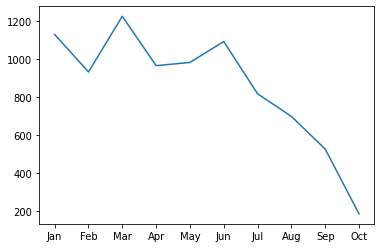

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(month_list, counter_list);

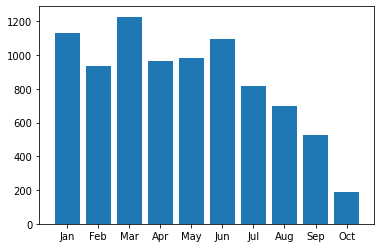

In [0]:
plt.bar(month_list, counter_list)
plt.show()